<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Tutorials/spatialAUC_tutorial_Xenium_whole_mouse_pup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading spatial transcriptomic and imaging data.

In [ ]:
!wget https://s3-us-west-2.amazonaws.com/10x.files/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_outs.zip

--2024-06-21 10:01:59--  https://s3-us-west-2.amazonaws.com/10x.files/samples/xenium/1.6.0/Xenium_V1_mouse_pup/Xenium_V1_mouse_pup_outs.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.234.248, 52.92.152.232, 52.92.129.200, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.234.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63763679465 (59G) [application/zip]
Saving to: ‘Xenium_V1_mouse_pup_outs.zip’

_V1_mouse_pup_outs.  99%[==================> ]  59.10G  20.5MB/s    eta 14s    

In [ ]:
!unzip /content/Xenium_V1_mouse_pup_outs.zip

Installing packages

In [ ]:
!pip install numpy
!pip install pseudovisium
!pip install spatialAUC


Loading packages

In [5]:
import squidpy as sq
import numpy as np

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


## Running pseudovisium_generate to perform hexagonal binning

In [6]:
from Pseudovisium.pseudovisium_generate import generate_pv
csv_file = "/content/transcripts.csv.gz"

output_path = "/content"
hexagon_size = 50
pseudovisium_path = generate_pv(csv_file=csv_file,
                                hexagon_size=hexagon_size,
                                output_path=output_path,
                                  batch_size=2000000,
                                technology="Xenium",
                                max_workers=10,
                                quality_filter=True,
                                quality_per_hexagon=False,
                                quality_per_probe=False,
                                tissue_hires_scalef=0.05,
                                project_name='mouse')

You are using version:  ['Pseudovisium==0.0.42']
Date:  2024-06-21
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to False
Quality counting per probe is set to False
Created temporary directory /tmp/tmp_hexalxtm99ai
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Created batch 13
Created batch 14
Created batch 15
Created batch 16
Created batch 17
Created batch 18
Created batch 19
Created batch 20
Created batch 21
Created batch 22
Created batch 23
Created batch 24
Created batch 25
Created batch 26
Created batch 27
Created batch 28
Created batch 29
Created batch 30
Created batch 31
Created batch 32
Created batch 33
Created batch 34
Created batch 35
Created batch 36
Created batch 37
Created batch 38
Created batch 39
Created batch 40
Created ba

Processing batches: 100%|██████████| 120/120 [09:27<00:00,  4.73s/batch]


Creating pseudovisium folder in output path:/content/pseudovisium/mouse
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


No quality information provided. Skipping quality information files.
No quality information provided. Skipping quality information files.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 191440902.0
Number of unique hexagons: 22521
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 2397.751053571701 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


## Creating anndata object and quick plot showing sum transcript abundance per hexagon

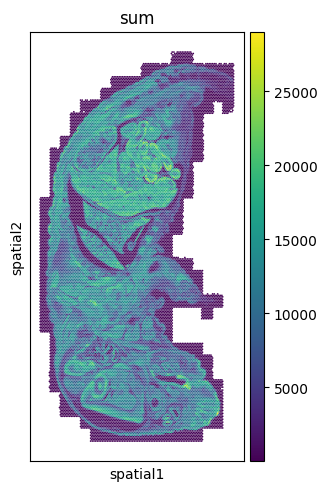

In [7]:
mouse_pup_pv = sq.read.visium("/content/pseudovisium/mouse/", library_id="library_id")
mouse_pup_pv.obs["sum"]= np.array(np.sum(mouse_pup_pv.X,axis=1)).flatten()
sq.pl.spatial_scatter(
    mouse_pup_pv,color="sum",img=False
)

Also printing the fake H&E. If you want the real H&E then you should supply it to pseudovisium_generate, like in https://github.com/BKover99/Pseudovisium/blob/main/Tutorials/Xenium_Tutorial.ipynb .

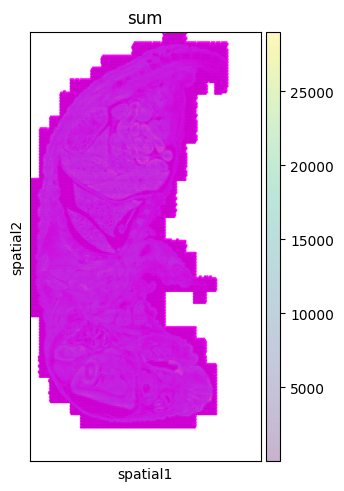

In [8]:
sq.pl.spatial_scatter(
    mouse_pup_pv,color="sum",img=True,alpha=0.3
)

In [14]:
adata_pv = sq.read.visium("/content/pseudovisium/mouse",library_id="library_id")
sc.pp.filter_genes(adata_pv, min_cells=50)
sc.pp.filter_cells(adata_pv, min_counts=100)
sc.pp.normalize_total(adata_pv, target_sum=1e4)
sc.pp.neighbors(adata_pv, n_neighbors=30, n_pcs=20)
sq.gr.spatial_neighbors(adata_pv, radius=250, coord_type="generic", delaunay=True)
adata_pv

         Falling back to preprocessing with `sc.pp.pca` and default params.


AnnData object with n_obs × n_vars = 19778 × 532
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'neighbors', 'spatial_neighbors'
    obsm: 'spatial', 'X_pca'
    obsp: 'distances', 'connectivities', 'spatial_connectivities', 'spatial_distances'

Given the very small gene panel, we can be generous with the filtering, and keep gene sets with only 10% of genes represented in the dataset (normally not a very good idea, and a default of 30-50% should be used).

In [20]:

from spatialAUC.spatialAUC import get_df_from_gmt
genes = adata_pv.var_names
df = get_df_from_gmt(['m5.all', 'm2.all'], '2023.1.Mm', genes,min_gene_ratio=0.1, min_gene_count=5)
df

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


,gene_set,genes,gene_present,total_genes,gene_names_present
0,GOBP_MONOCYTE_CHEMOTAXIS,"[Msmp, Ccl21b, Ano6, Aif1, App, Ccr1, Ccr1l1, ...",6,59,"[Nbl1, Ccn3, Ccl9, Ctsg, S100a14, Ccl12]"
1,GOBP_SUPEROXIDE_METABOLIC_PROCESS,"[Acp5, Agt, Agtr1a, Akt1, Apoa4, App, Atp7a, C...",7,69,"[Fbln5, Nox4, Mpo, Cybb, Cd36, Ncf4, Sod3]"
2,GOBP_WATER_TRANSPORT,"[Slc14a1, Aqp1, Aqp2, Aqp3, Aqp4, Aqp5, Aqp6, ...",8,20,"[Slc14a1, Aqp3, Upk3a, Aqp1, Aqp4, Aqp7, Aqp5,..."
3,GOBP_COMPLEMENT_ACTIVATION,"[C7, C8b, Cfd, Cd5l, Serping1, C1qa, C1qb, C1q...",6,58,"[Fcnb, Colec11, C3, Cfh, Hc, Cd5l]"
4,GOBP_UREA_TRANSPORT,"[Slc14a1, Aqp3, Aqp7, Aqp8, Pou3f3, Slc12a1, U...",6,10,"[Slc14a1, Aqp3, Slc14a2, Upk3a, Pou3f3, Aqp7]"
5,GOBP_PEPTIDE_CROSS_LINKING,"[Cstdc5, Cstdc6, Dsp, Bgn, Col3a1, Dcn, Epb42,...",7,45,"[F13a1, Stfa2l1, Bgn, Mamdc2, Lor, Ivl, Cstdc4]"
6,GOBP_ONE_CARBON_COMPOUND_TRANSPORT,"[Slc14a1, Aqp1, Aqp3, Aqp4, Aqp5, Aqp6, Aqp7, ...",12,41,"[Slc14a1, Car2, Aqp3, Slc14a2, Upk3a, Slc4a4, ..."
7,GOBP_WATER_HOMEOSTASIS,"[Atp6v1b1, Adcy6, Akr1b3, Anxa7, Aqp1, Aqp2, A...",6,34,"[Aqp3, Aqp1, Aqp4, Aqp7, Atp6v1b1, Sct]"
8,GOBP_NEGATIVE_REGULATION_OF_BMP_SIGNALING_PATHWAY,"[Abl1, Cav1, Cer1, Chrd, Dkk1, Dlx1, Fbn1, Fzd...",7,58,"[Nbl1, Sostdc1, Sfrp1, Cav1, Htra3, Tnfaip6, L..."
9,GOBP_NEUTROPHIL_CHEMOTAXIS,"[Ccl21b, Ccl21d, Itga9, Nckap1l, Gbf1, Itga1, ...",11,105,"[Rac2, Csf3r, Ppbp, Cxcr2, C5ar1, Ccl9, Tnfaip..."


Let's plot the results. My favourite ones are the kidney ones!

In [23]:
import scanpy as sc
from spatialAUC.spatialAUC import spatial_auc

morans_table, adata_updated = spatial_auc(adata_pv, gene_sets=["m5.all", "m2.all"],min_gene_ratio=0.12, min_gene_count=5)

# Access the results
morans_table

/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]
/usr/local/lib/python3.10/dist-packages/gseapy/msigdb.py:72: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d = pd.read_html(resp.text)[0]


  0%|          | 0/1000 [00:00<?, ?/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
GOMF_EXTRACELLULAR_MATRIX_STRUCTURAL_CONSTITUENT,0.720356,0.0,0.000017,0.0,0.000999,0.000038,0.0,0.0,0.000999
GOBP_NEGATIVE_REGULATION_OF_BMP_SIGNALING_PATHWAY,0.667465,0.0,0.000017,0.0,0.000999,0.000038,0.0,0.0,0.000999
GOBP_RENAL_ABSORPTION,0.645804,0.0,0.000017,0.0,0.000999,0.000032,0.0,0.0,0.000999
GOMF_FIBRONECTIN_BINDING,0.609455,0.0,0.000017,0.0,0.000999,0.000030,0.0,0.0,0.000999
GOCC_CORNIFIED_ENVELOPE,0.604979,0.0,0.000017,0.0,0.000999,0.000031,0.0,0.0,0.000999
REACTOME_METABOLISM_OF_FAT_SOLUBLE_VITAMINS,0.604775,0.0,0.000017,0.0,0.000999,0.000033,0.0,0.0,0.000999
GOBP_SARCOMERE_ORGANIZATION,0.600735,0.0,0.000017,0.0,0.000999,0.000031,0.0,0.0,0.000999
REACTOME_AQUAPORIN_MEDIATED_TRANSPORT,0.565651,0.0,0.000017,0.0,0.000999,0.000031,0.0,0.0,0.000999
GOMF_PROTEOGLYCAN_BINDING,0.561204,0.0,0.000017,0.0,0.000999,0.000032,0.0,0.0,0.000999
GOBP_ONE_CARBON_COMPOUND_TRANSPORT,0.540265,0.0,0.000017,0.0,0.000999,0.000031,0.0,0.0,0.000999


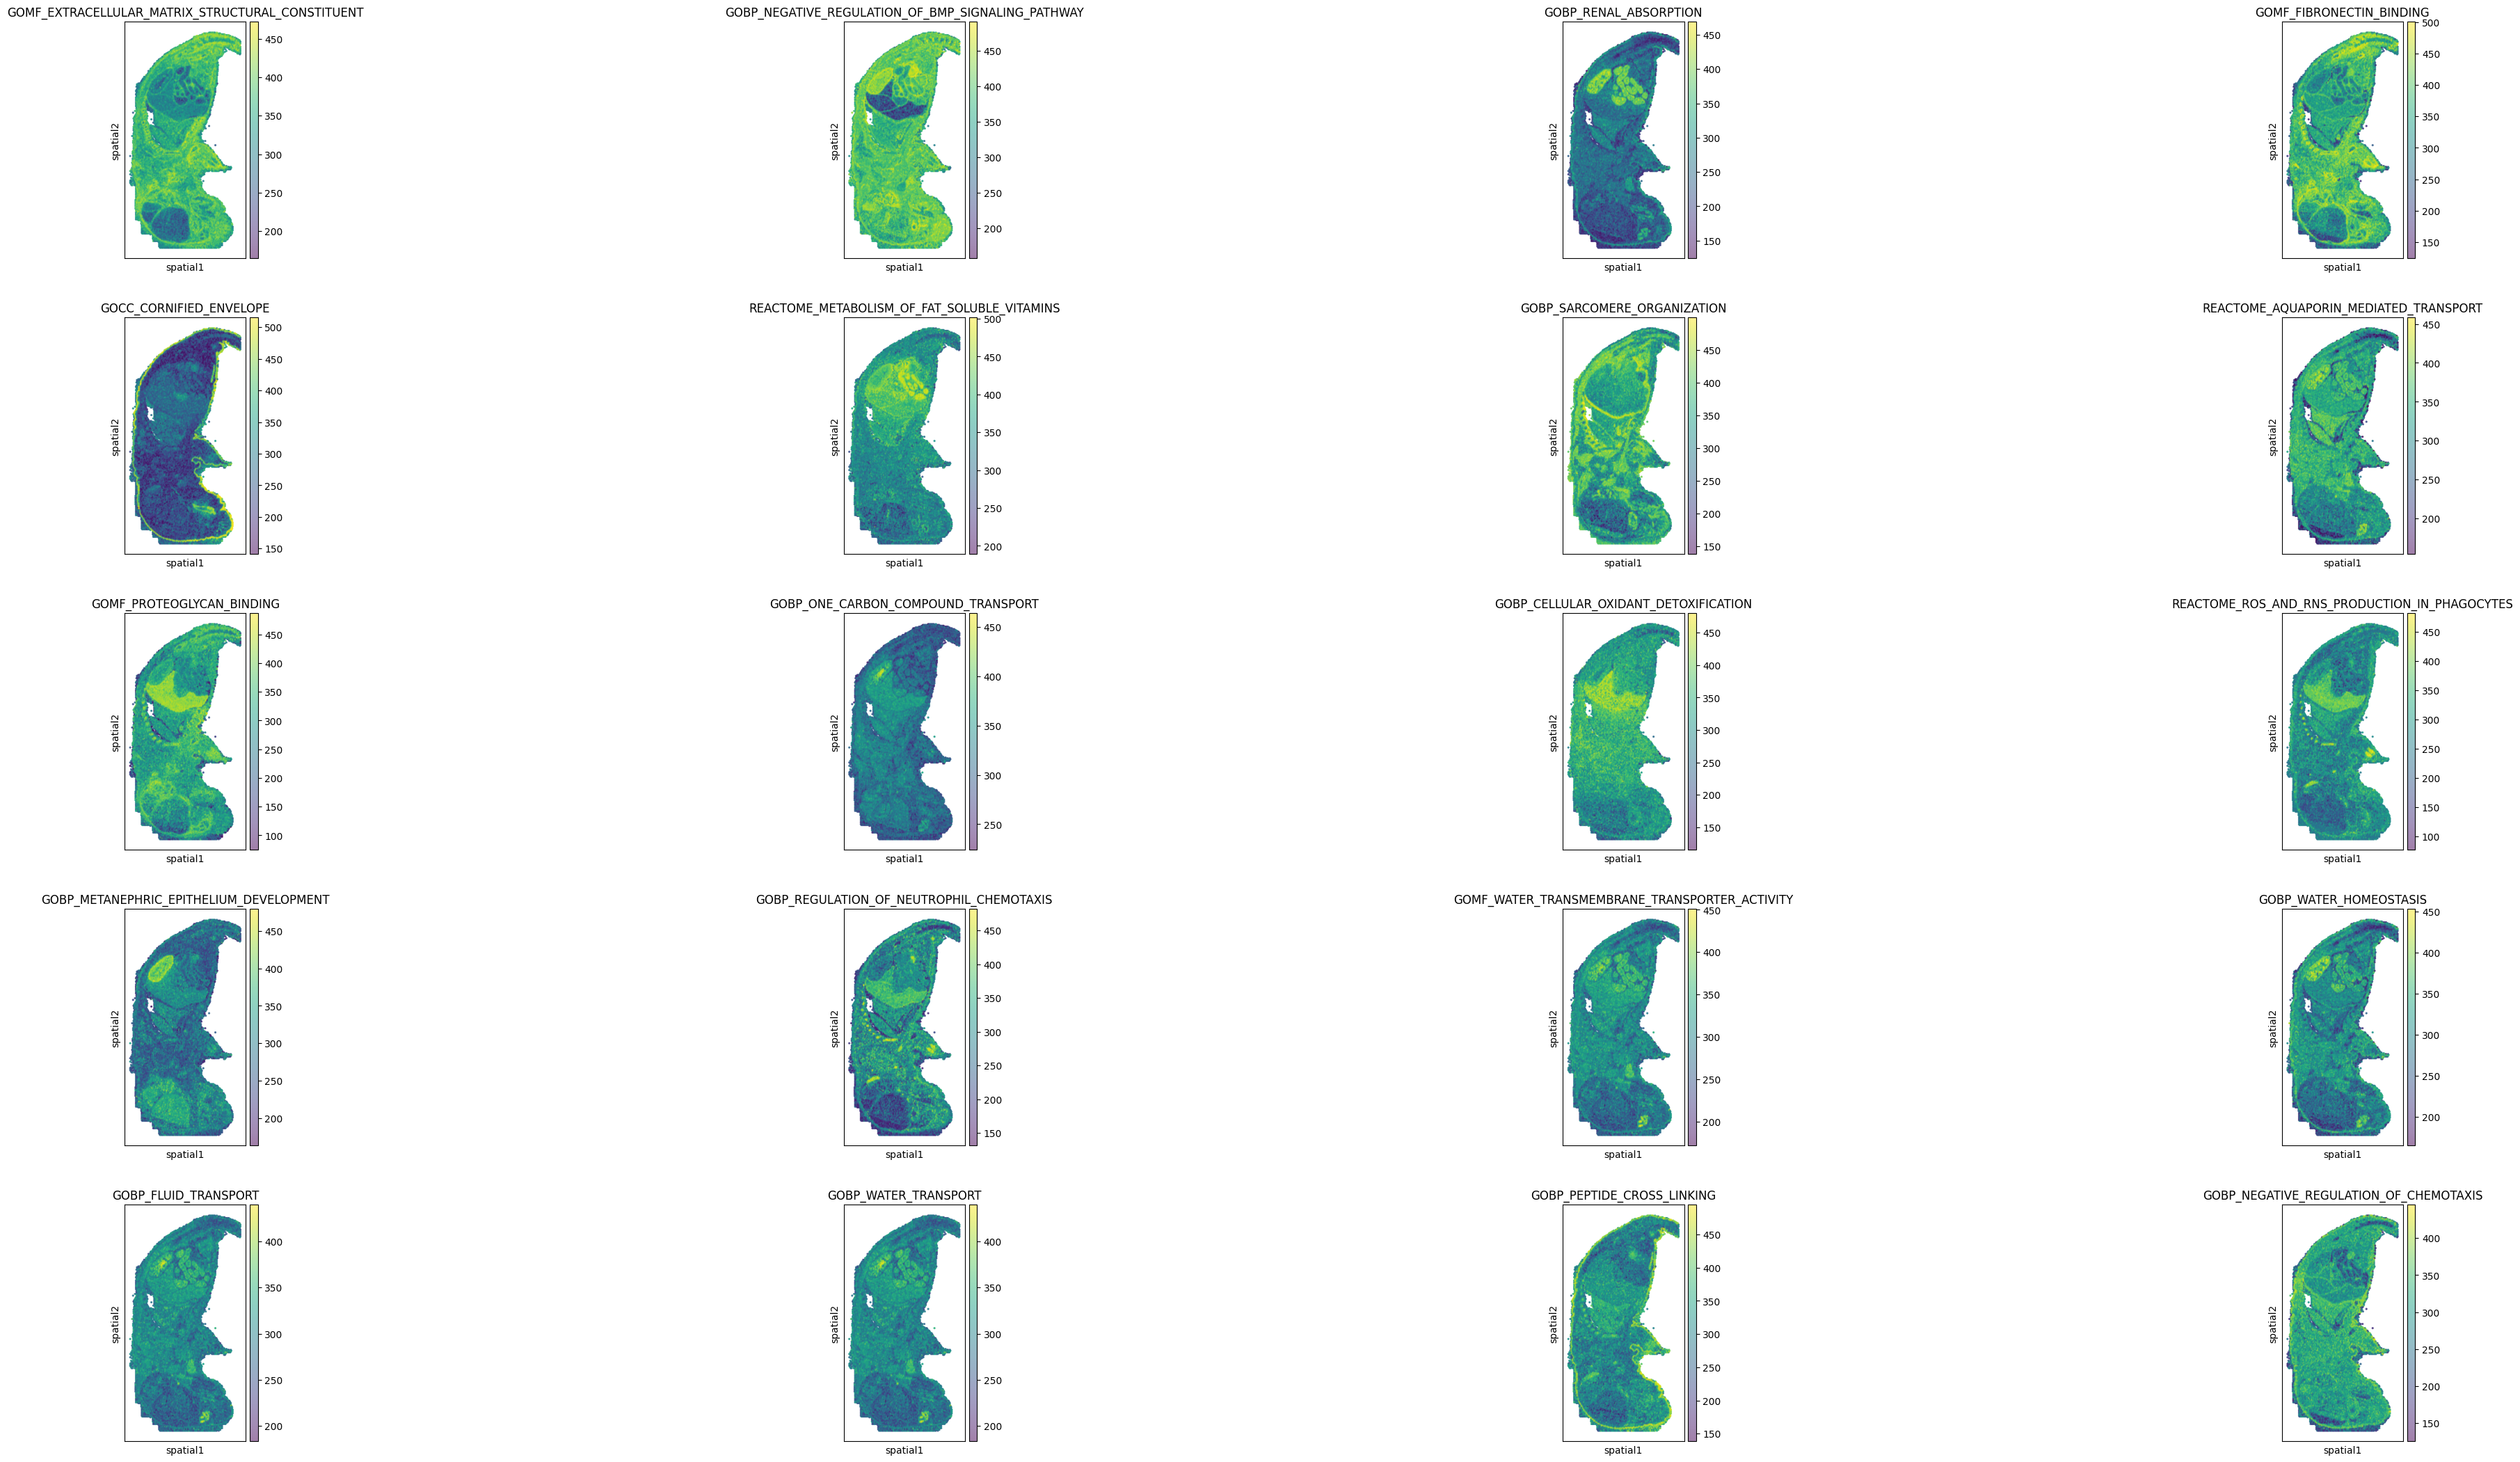

In [24]:
sq.pl.spatial_scatter(
        adata_updated, library_id="spatial", shape=None, color=morans_table.head(20).index.values,
        img=True, alpha=0.5, wspace=0.8
    )